In [37]:
#Step1- Import all the required Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

In [38]:
#Step2-Load the Iris Dataset

iris=datasets.load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [39]:
#Step3- Find Optimum Clusters

df_x=df.iloc[:,[0,1,2,3]].values


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


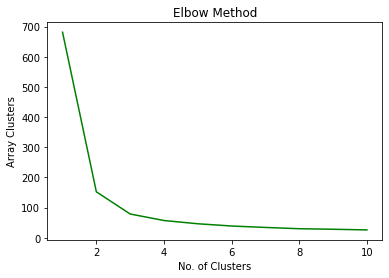

In [40]:
array_clusters=[]               # Creating an array to store within sum clusters 

for i in range(1,11):
    kmeans_model=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans_model.fit(df_x)
    array_clusters.append(kmeans_model.inertia_)
    
# Plotting the results onto a line for better representation
# Using the 'Elbow method' for calculation of clusters

plt.plot(range(1,11),array_clusters,color='green')
plt.title('Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Array Clusters')
plt.show()

In [46]:
# We see that after n=3 no further variation is obeserved thus,number of clusters are 3

#Step4-Apply Kmeans to the dataset  

kmeans_model=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)

kmeans_res=kmeans_model.fit_predict(df_x)

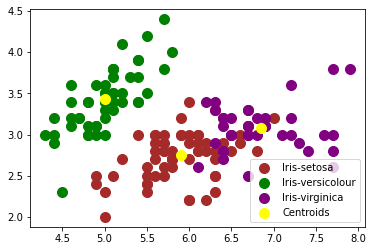

In [50]:
#Step5-Visualization(Plotting the clusters so formed)

plt.scatter(df_x[kmeans_res == 0, 0], df_x[kmeans_res == 0, 1], s = 100, c = 'brown', label = 'Iris-setosa')
plt.scatter(df_x[kmeans_res == 1, 0], df_x[kmeans_res== 1, 1], s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(df_x[kmeans_res == 2, 0], df_x[kmeans_res == 2, 1], s = 100, c = 'purple', label = 'Iris-virginica')
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:,1],s = 100, c = 'yellow', label = 'Centroids')

plt.legend()